In [49]:
import os 
import pandas as pd 
import numpy as np 
from sklearn.manifold import TSNE
import seaborn as sns
import cv2
import glob
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms

resnet18 = models.resnet18(pretrained=True)
modules=list(resnet18.children())[:-1]
resnet18=nn.Sequential(*modules)
for p in resnet18.parameters():
    p.requires_grad = False


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jechterh/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
names = glob.glob(f"{path}/*.jpeg")[0:1000]

In [74]:
path = '/home/jechterh/private/group-9/nih_data/train'
images = [resnet18(torch.tensor(cv2.resize(cv2.imread(file), (224,224))).permute(2,0,1).float().unsqueeze(0)).squeeze() for file in glob.glob(f"{path}/*.jpeg")[0:1000]]


In [68]:
images_new = np.concatenate(images, axis=0).reshape(10, -1)


In [69]:
images_new.shape

(10, 512)

In [70]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)

In [71]:
z = tsne.fit_transform(images_new) 

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.001s...
[t-SNE] Computed neighbors for 10 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.898937
[t-SNE] KL divergence after 1000 iterations: 0.250724


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

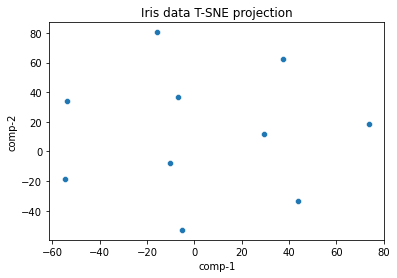

In [72]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", #hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection") 